In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Dataset Download and Train Test Split

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train[0].shape

(28, 28)

In [4]:
len(X_train),len(X_test)

(60000, 10000)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

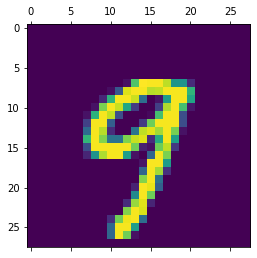

In [11]:
plt.matshow(X_train[45])

In [12]:
y_train[45]

9

# We need to scale the dataset to increase the accuracy

In [13]:
X_train= X_train / 255
X_test = X_test / 255

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
X_train_flattened= X_train.reshape(len(X_train),28*28)

In [17]:
X_train_flattened.shape

(60000, 784)

In [18]:
X_test_flattened= X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

# Creating a stack of layers for the Neural Network 

In [20]:
model = keras.Sequential([
 keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')   
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
                            )

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4710 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 1s 659us/step - loss: 0.3043 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9216
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2671 - accuracy: 0.9248


In [21]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2666 - accuracy: 0.9261


[0.26664331555366516, 0.9261000156402588]

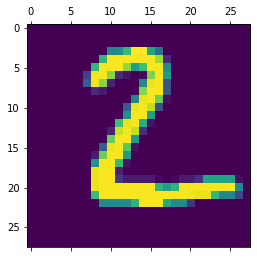

In [23]:
plt.matshow(X_test[1])

In [24]:
y_predicted= model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [27]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [28]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [29]:
np.argmax(y_predicted[1])

2

# PLOTING CONFUSION MATRIX

In [30]:
cm=tf.math.confusion_matrix(labels=y_test, predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    4,    2,    2,    0],
       [   0, 1114,    2,    2,    1,    1,    4,    2,    9,    0],
       [   7,   10,  912,   20,   12,    4,   11,   10,   42,    4],
       [   2,    0,   16,  931,    2,   22,    1,    9,   18,    9],
       [   1,    2,    5,    1,  927,    0,    6,    3,    7,   30],
       [   8,    2,    3,   42,   13,  768,   12,    5,   32,    7],
       [  12,    3,    7,    2,    9,   17,  903,    2,    3,    0],
       [   1,    5,   22,    8,   10,    0,    0,  947,    2,   33],
       [   5,    8,    5,   22,   10,   23,    8,   10,  873,   10],
       [  11,    7,    1,   10,   29,    6,    0,   17,    6,  922]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

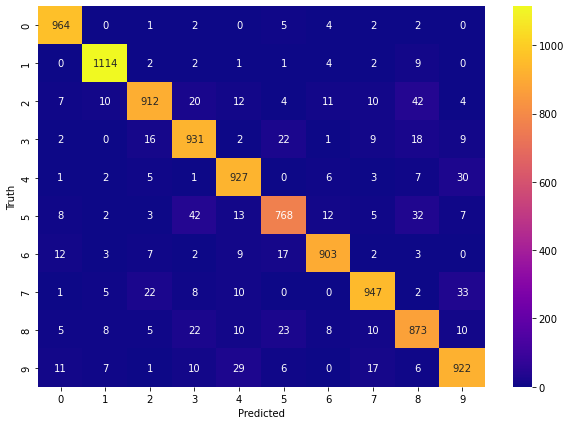

In [35]:
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True , fmt='d', cmap='plasma')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add hidden layer to improve performance

In [36]:
model2 = keras.Sequential([
 keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
                            )

model2.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2763 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1272 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0880 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0677 - accuracy: 0.9789
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0533 - accuracy: 0.9836


In [37]:
model2.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0770 - accuracy: 0.9754


[0.07697302848100662, 0.9753999710083008]

In [38]:
y_predicted2= model2.predict(X_test_flattened)
y_predicted_labels2=[np.argmax(i) for i in y_predicted2]
y_predicted_labels2[:5]
cd=tf.math.confusion_matrix(labels=y_test, predictions= y_predicted_labels2)
cd

313/313 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    2,    1,    8,    1,    4,    3],
       [   0, 1120,    4,    1,    0,    0,    3,    1,    6,    0],
       [   5,    2, 1007,    0,    3,    0,    5,    6,    3,    1],
       [   0,    0,    5,  979,    1,    8,    1,    7,    5,    4],
       [   0,    0,    3,    1,  959,    0,    4,    2,    0,   13],
       [   1,    0,    0,    6,    0,  870,    7,    2,    2,    4],
       [   2,    2,    1,    1,    4,    4,  942,    0,    2,    0],
       [   1,    4,   10,    2,    2,    0,    0,  995,    4,   10],
       [   2,    0,    3,    4,    3,    3,    3,    3,  949,    4],
       [   0,    3,    0,    5,   11,    3,    1,    6,    4,  976]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

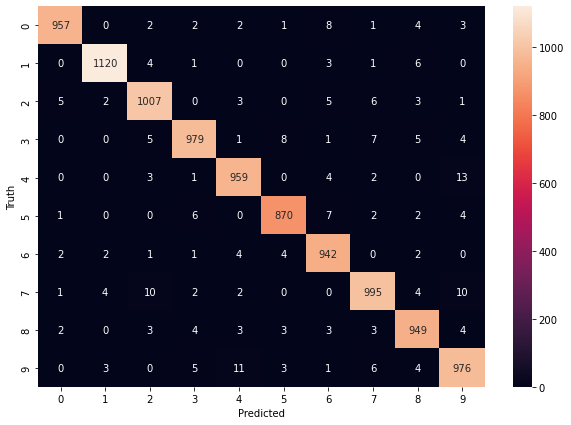

In [39]:
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cd, annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')